In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt
import pcmdpy as ppy
%matplotlib inline

In [18]:
f = ppy.instrument.default_m31_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)


In [19]:
def imf_flux(log_age):
    g = ppy.galaxy.SSPSimple(np.array([0., -2., 0., log_age]))
    imf, mags = iso_model.model_galaxy(g)
    flux = np.array([f_.mag_to_counts(m) for f_,m in zip(f, mags)])
    return imf, flux

In [28]:
def cumu_plot(log_age, axes=None):
    if axes is None:
        fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
        axes[0].set_title('F814W')
        axes[1].set_title('F475W')
    imf, flux = imf_flux(log_age)
    sort_idx = imf.argsort()
    imf = imf[sort_idx]
    flux1 = flux[0][sort_idx]
    flux2 = flux[1][sort_idx]
    x = np.log10(imf)
    y1 = np.cumsum(flux1*imf) / np.sum(flux1*imf)
    y2 = np.cumsum(flux2*imf) / np.sum(flux2*imf)
    axes[0].plot(x, y1, ls='-', label=log_age)
    axes[1].plot(x, y2, ls='-', label=log_age)
    return axes

Text(0,0.5,'Cumulative Fraction of Light')

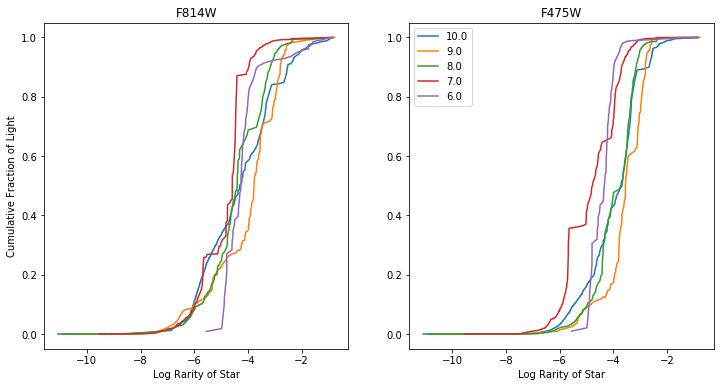

In [31]:
axes = cumu_plot(10.)
cumu_plot(9., axes=axes)
cumu_plot(8., axes=axes)
cumu_plot(7., axes=axes)
cumu_plot(6., axes=axes)
plt.legend(loc=0)
for a in axes:
    a.set_xlabel('Log Rarity of Star')
axes[0].set_ylabel('Cumulative Fraction of Light')

In [ ]:
imf_10.argsort()